In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = 'C:/Users/Owner/Documents/Chocolate Bar Analysis/02 Data/Original Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'Chocolate_bar_ratings.csv'))

In [5]:
df.shape

(2501, 11)

In [6]:
df.head()

,ref,manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin,cocoa_percent,number_of_ingredients,ingredients,characteristics,rating
0,1776,Forteza (Cortes),Puerto Rico,2016,Dominican Republic,Puerto Rico,0.80,6,"B,S,C,V,L,Sa","vanilla, dried fruit, nuts",2.75
1,1776,Forteza (Cortes),Puerto Rico,2016,Dominican Republic,Dominican Republic,0.70,6,"B,S,C,V,L,Sa","strong vanilla, earthy, nutty",2.75
2,1992,Alain Ducasse,France,2017,Mexico,"Porcelana, Mexique",0.75,6,"B,S,C,V,L,Sa","strawberry, cream, gateway",3.50
3,1215,Alain Ducasse,France,2014,Trinidad,Trinite,0.65,6,"B,S,C,V,L,Sa","roasty, sweet, savory",2.75
4,741,Grand Place,Vietnam,2011,Vietnam,"Ben Tre, Dong Nai",0.72,5,"B,S,C,V,L","fatty, vanilla, dairy",3.00


In [7]:
df_2 = df.drop(columns=['manufacturer', 'company_location', 'country_of_bean_origin', 'specific_bean_origin', 'ingredients', 'characteristics'])

In [8]:
df_2.head()

,ref,review_date,cocoa_percent,number_of_ingredients,rating
0,1776,2016,0.80,6,2.75
1,1776,2016,0.70,6,2.75
2,1992,2017,0.75,6,3.50
3,1215,2014,0.65,6,2.75
4,741,2011,0.72,5,3.00


# Elbow Technique

In [9]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [10]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] 

score

[-1488184179.7703254,
 -401794569.4260853,
 -173483927.96512434,
 -99692486.7626427,
 -61903229.539077505,
 -43252824.22804596,
 -31663112.61187692,
 -24916664.717520226,
 -19331997.40393531]

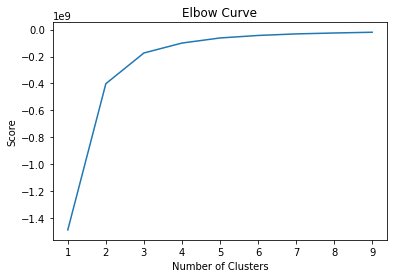

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# K-means Clustering

In [13]:
kmeans = KMeans(n_clusters = 3)

In [14]:
kmeans.fit(df_2)

KMeans(n_clusters=3)

In [15]:
df_2['clusters'] = kmeans.fit_predict(df_2)

In [16]:
df_2.head()

,ref,review_date,cocoa_percent,number_of_ingredients,rating,clusters
0,1776,2016,0.80,6,2.75,2
1,1776,2016,0.70,6,2.75,2
2,1992,2017,0.75,6,3.50,1
3,1215,2014,0.65,6,2.75,2
4,741,2011,0.72,5,3.00,0


In [17]:
df_2['clusters'].value_counts()

2    897
1    881
0    723
Name: clusters, dtype: int64

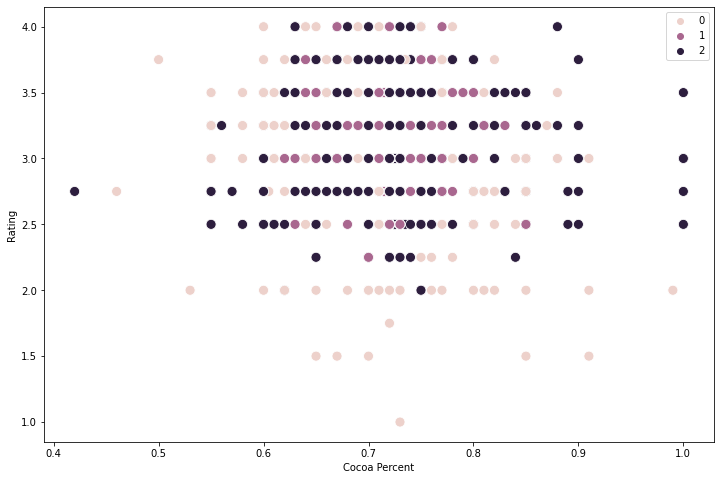

In [21]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['cocoa_percent'], y=df_2['rating'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Cocoa Percent') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

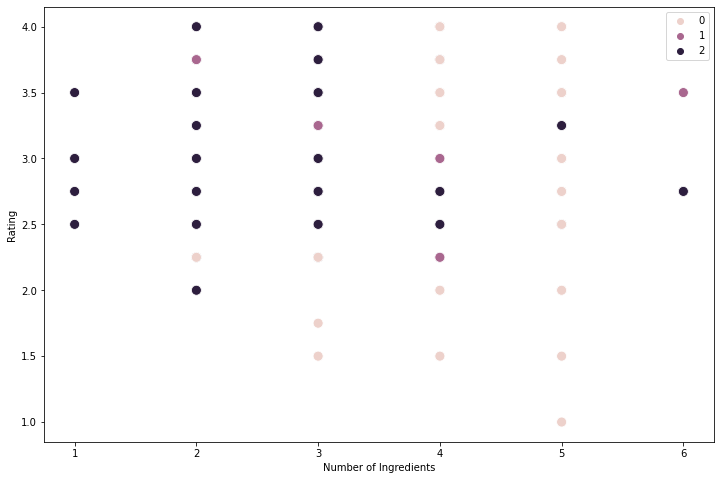

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['number_of_ingredients'], y=df_2['rating'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Ingredients') 
plt.ylabel('Rating') 
plt.show()

In [26]:
df.loc[df_2['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df_2['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df_2['clusters'] == 0, 'cluster'] = 'pink'

In [28]:
df_2.groupby('clusters').agg({'review_date':['mean', 'median'], 
                         'cocoa_percent':['mean', 'median'], 
                         'number_of_ingredients':['mean', 'median'],
                          'rating':['mean', 'median']})

review_date         cocoa_percent        number_of_ingredients  \
                 mean  median          mean median                  mean   
clusters                                                                   
0         2009.619640  2010.0      0.709820    0.7              3.515906   
1         2019.040863  2019.0      0.714529    0.7              2.772985   
2         2014.420290  2014.0      0.718868    0.7              2.905240   

                   rating         
         median      mean median  
clusters                          
0           4.0  3.161134   3.25  
1           3.0  3.240636   3.25  
2           3.0  3.224359   3.25

In [ ]:
#There is no correlction with cocoapercentage or number of ingredients. 